In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import Optional, List, Callable, Any, Union, Dict
from itertools import product
from statistics import mean
from pathlib import Path
import gzip
import os
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns

/Users/juliajallad/Documents/GitHub/OT02---Data-Mining/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
import random

# Training

### Load and preprocess data

In [6]:
data = pd.read_csv('data/features_filtered_final.csv')
data

,battleneturl,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x1,hotkey01,hotkey02,hotkey10,hotkey11,...,hotkey61_f5,hotkey62_f5,hotkey70_f5,hotkey80_f5,hotkey90_f5,s_f5,Base_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
0,53,0.063965,0.006264,0.000475,6.990596,0.000000,0.0,0.024773,0.038066,0.000000,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,True,False,False
1,29,0.051058,0.001139,0.000000,6.384615,0.001965,0.0,0.050151,0.039275,0.001813,...,0.0,0.0,0.0,0.0,0.0,6.0,3.0,True,False,False
2,53,0.040809,0.004460,0.000285,6.867347,0.000000,0.0,0.017822,0.016832,0.000000,...,0.0,0.0,0.0,0.0,0.0,4.0,2.0,True,False,False
3,29,0.037677,0.001993,0.000000,6.861386,0.001031,0.0,0.038806,0.031841,0.000995,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,True,False,False
4,53,0.019740,0.000190,0.000000,5.820755,0.000000,0.0,0.000000,0.018519,0.000000,...,0.0,0.0,0.0,0.0,0.0,4.0,2.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,196,0.039480,0.000095,0.002562,16.219512,0.000000,0.0,0.000000,0.049180,0.000000,...,0.0,0.0,1.0,0.0,1.0,5.0,0.0,False,True,False
3032,189,0.051817,0.000664,0.000000,15.593496,0.010973,0.0,0.000000,0.006557,0.013115,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,False,False,True
3033,196,0.075448,0.000000,0.002088,14.481481,0.000000,0.0,0.000000,0.033488,0.000000,...,0.0,0.0,1.0,0.0,1.0,3.0,0.0,False,True,False
3034,189,0.113790,0.001234,0.000000,14.863850,0.020961,0.0,0.000000,0.005581,0.010233,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,False,False,True


In [8]:
# Check missing values before cleaning
missing_before = data.isna().sum().sum()
print(f"Missing values: {missing_before}")

Missing values: 0


In [9]:
# Split the data into training and testing sets
X = data.drop(['battleneturl'], axis=1)
#X = data.drop(['battleneturl', 'played_race_Protoss', 'played_race_Terran', 'played_race_Zerg'], axis=1)
y = data['battleneturl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x1,hotkey01,hotkey02,hotkey10,hotkey11,hotkey12,...,hotkey61_f5,hotkey62_f5,hotkey70_f5,hotkey80_f5,hotkey90_f5,s_f5,Base_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
227,0.054854,0.000095,0.000095,9.628571,0.004848,0.000000,0.000000,0.023474,0.002817,0.125822,...,1.0,1.0,0.0,0.0,0.0,6.0,0.0,False,True,False
365,0.116352,0.001329,0.000000,11.010949,0.034289,0.000000,0.000000,0.022711,0.037363,0.407326,...,0.0,0.0,0.0,0.0,0.0,6.0,1.0,False,False,True
2924,0.010819,0.000190,0.000095,8.160000,0.000000,0.000000,0.000000,0.075325,0.000000,0.392208,...,0.0,0.0,1.0,0.0,1.0,5.0,0.0,True,False,False
2501,0.041853,0.002562,0.000664,9.149378,0.001155,0.000830,0.000000,0.003320,0.000000,0.513693,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,True,False,False
2001,0.040714,0.005030,0.000000,13.087336,0.000000,0.000000,0.000000,0.029437,0.000000,0.422511,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.089589,0.000000,0.001424,9.551282,0.000494,0.000000,0.037700,0.001917,0.000000,0.275399,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False
1095,0.108095,0.004840,0.000190,10.379592,0.016999,0.000000,0.000000,0.014694,0.014694,0.202449,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,False,False,True
1130,0.035494,0.000380,0.000000,15.341463,0.013898,0.003252,0.091057,0.030894,0.026016,0.596748,...,0.0,0.0,0.0,0.0,1.0,3.0,2.0,False,False,True
1294,0.087406,0.000000,0.012907,12.275472,0.000000,0.000000,0.000000,0.024719,0.000000,0.367790,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,False,True,False


In [11]:
# Ensure all column names in X_train are strings
X_train.columns = X_train.columns.astype(str)

# Repeat the same for X_test if applicable
X_test.columns = X_test.columns.astype(str)

### Hyperparameter tuning

In [12]:
# Define a  set of hyperparameters to tune
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2'],  # Limit features considered at each split

}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search (only 10 trials)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=30,  
    cv=2,  
    scoring='accuracy', 
    n_jobs=-1,  
    verbose=1, 
    random_state=42,
    error_score='raise',  # Ensure errors don't silently pass
    refit=True,  # Refit the best model after search
)

In [13]:
# Fit on training data
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model
best_rf = random_search.best_estimator_

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [15]:
best_params = random_search.best_params_

# Train the final model with best parameters
rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Train the model on the full training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=500,
                       random_state=42)

In [17]:
# Make predictions
y_pred = rf_model.predict(X_test)

### Evaluate

In [18]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

Accuracy: 0.88
F1-Score: 0.87


Model training with hyperparameters -> previous hyperparameters

Train the final model with best parameters (input manually just to run the model without having to run randomized search again)
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

 Train the model on the full training data
rf_model.fit(X_train, y_train)


### Feature importance

In [153]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
          Feature  Importance
16       hotkey42    0.054124
32              s    0.052956
19       hotkey52    0.051980
13       hotkey32    0.051451
22       hotkey62    0.046774
0            Base    0.045986
10       hotkey22    0.045228
5        hotkey10    0.042366
7        hotkey12    0.041888
11       hotkey30    0.041634
14       hotkey40    0.039953
8        hotkey20    0.038934
33              0    0.036882
17       hotkey50    0.035036
20       hotkey60    0.032459
4        hotkey02    0.031227
2        hotkey00    0.029919
25       hotkey72    0.027410
23       hotkey70    0.026833
26       hotkey80    0.026178
1   SingleMineral    0.025756
28       hotkey82    0.024419
29       hotkey90    0.023343
6        hotkey11    0.022922
31       hotkey92    0.022556
18       hotkey51    0.012904
3        hotkey01    0.012642
15       hotkey41    0.012621
9        hotkey21    0.011539
24       hotkey71    0.007720
12       hotkey31    0.007226
30       hotkey91  

In [154]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features")
plt.gca().invert_yaxis()  # Flip to show most important features on top
#plt.show()

### SHAP values

In [19]:
# Create the SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

In [20]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [21]:
print("shap_values shape:", np.array(shap_values).shape)
print("X_test shape:", X_test.shape)


shap_values shape: (608, 46, 199)
X_test shape: (608, 46)


In the shap_values, there are 609 observations, 46 features and 200 classes. 

In [ ]:
shap_values

#### SHAP values on one class

For a multi-class model, to visualize the summary_plot it's necessary to select a class (in this case, out ot 200 classes - players-).
If you calculate SHAP values for a classification model, you’ll often get a shape of (n_samples, n_features, n_classes) because SHAP explains the probability of each class.  

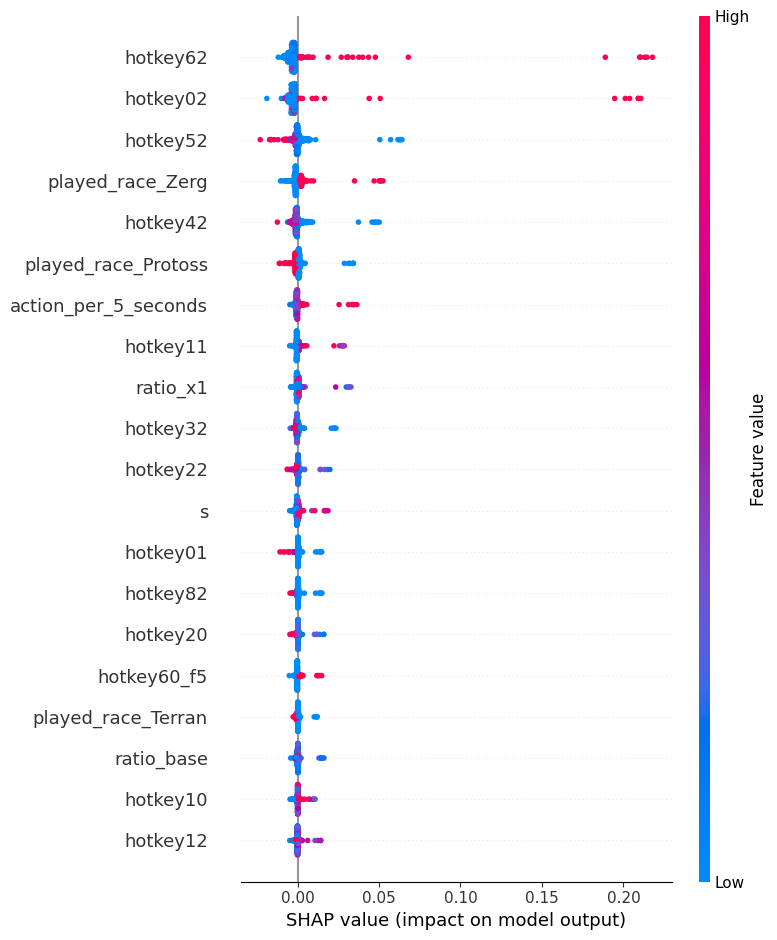

In [23]:
# Generate a SHAP summary plot
shap.summary_plot(shap_values[..., 40], X_test)


In the above example, analysing the class 42, therefore, the player with code 42, the number of times the hotckey 62 was pressed per second was the most relevant feature. Higher occurrences of hotckey 62 per second were associated with a higher probability of being the player 42, while lower occurrences of hotckey62 per second were related to lower probabilities of being the player 62.

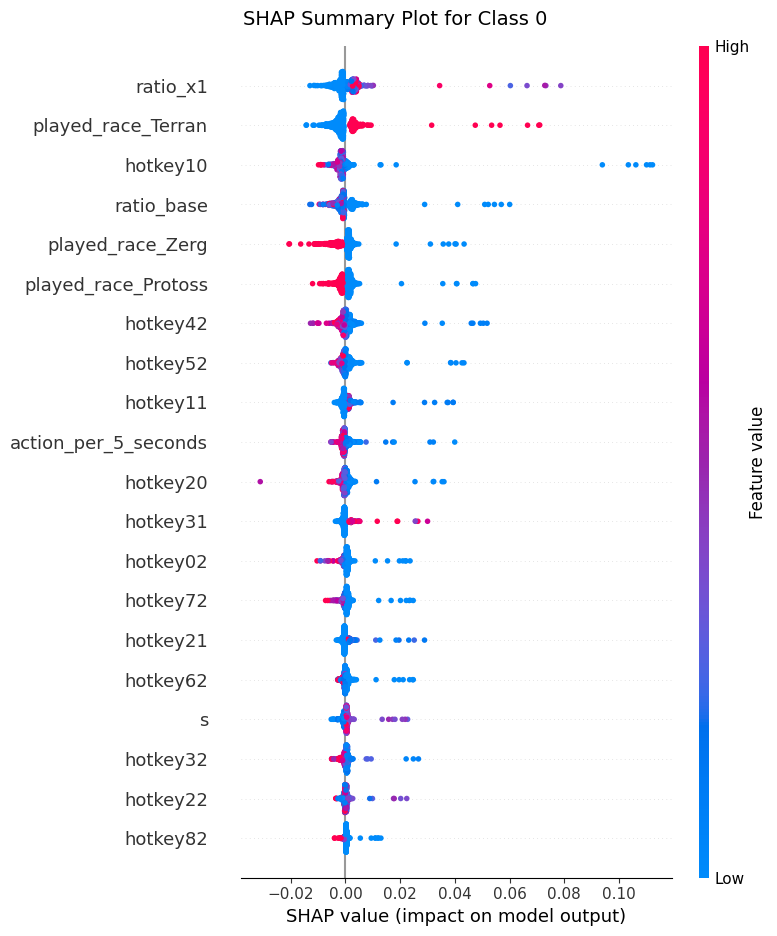

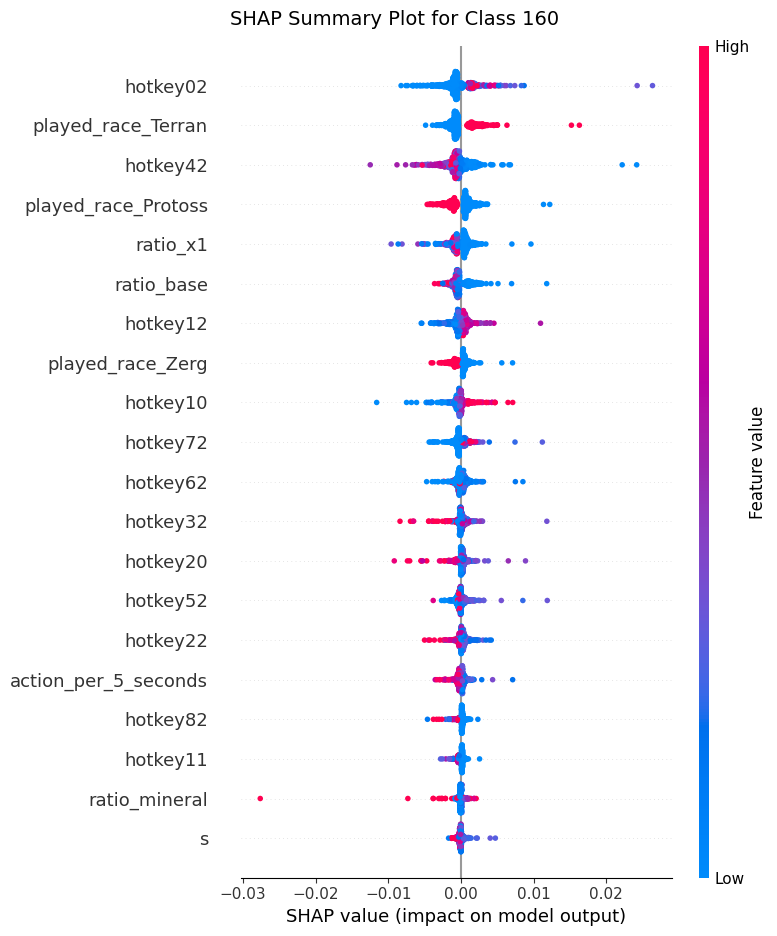

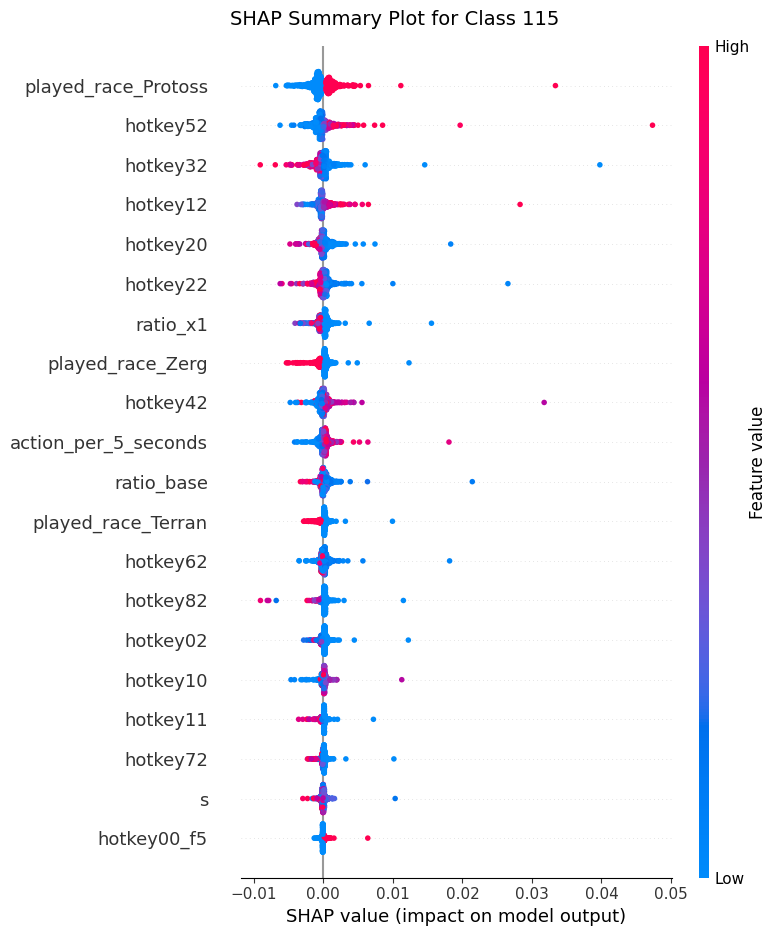

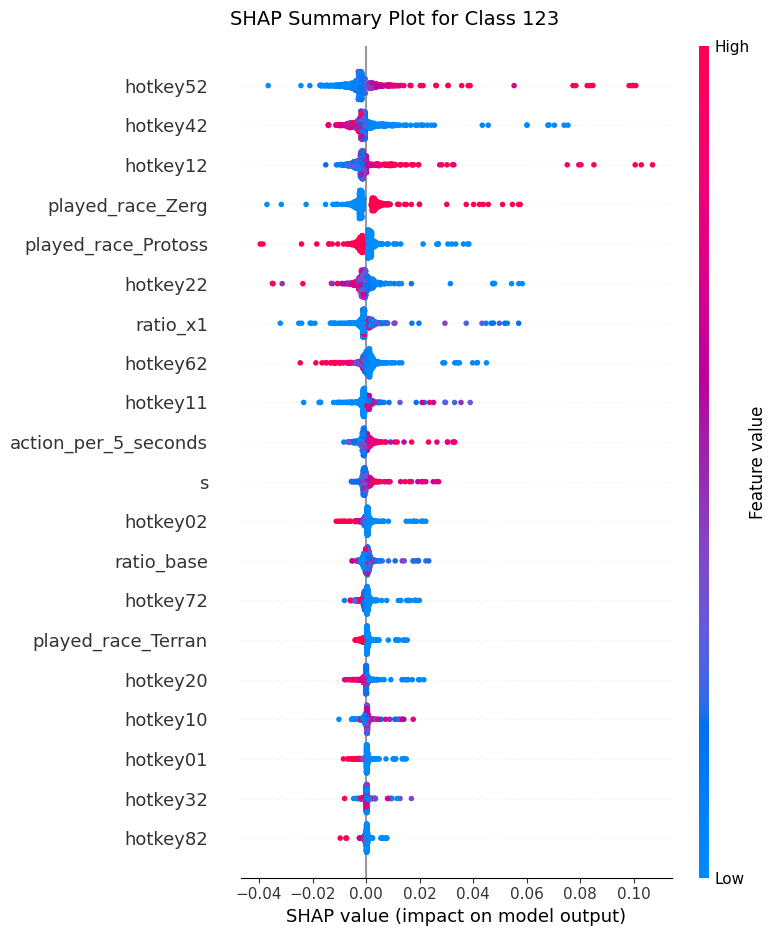

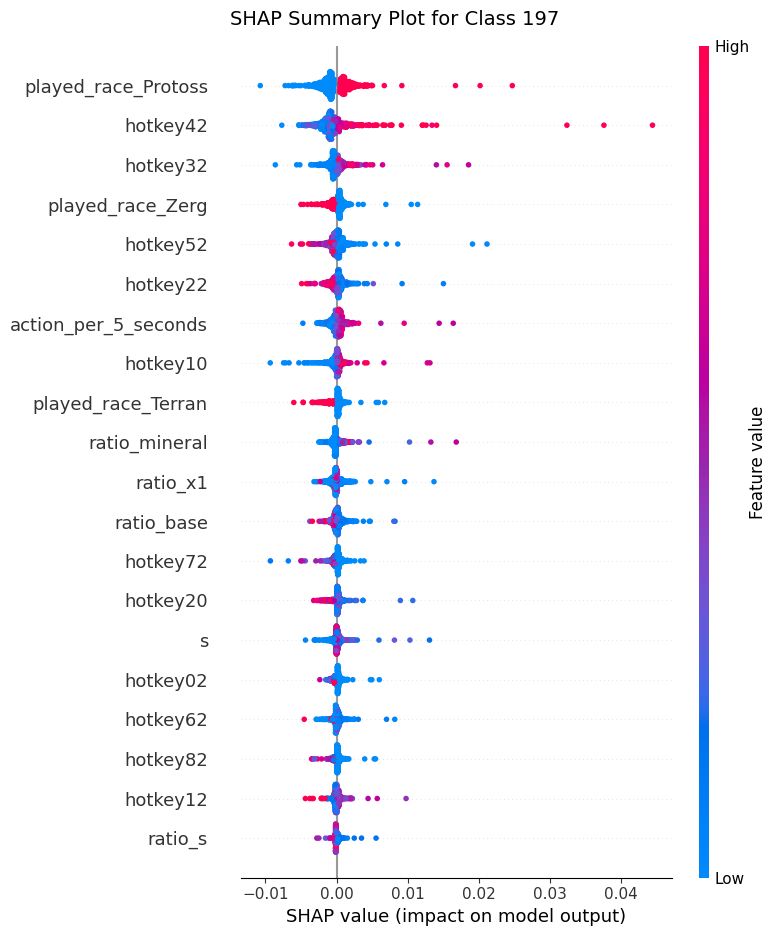

In [47]:
num_plots = 5  

# Select 5 random indices from the third dimension of shap_values
random_classes = random.sample(range(shap_values.shape[2]), num_plots)

# Generate and display the summary plots
for class_idx in random_classes:
    plt.figure(figsize=(10, 6))  # Adjust figure size for readability
    plt.suptitle(f"SHAP Summary Plot for Class {class_idx}", fontsize=14)  # Title before plotting
    shap.summary_plot(shap_values[..., class_idx], X_test, show=False)  # Generate plot without immediate display
    plt.show()  # Display the plot

#### Global view of features importances over all classes (players)

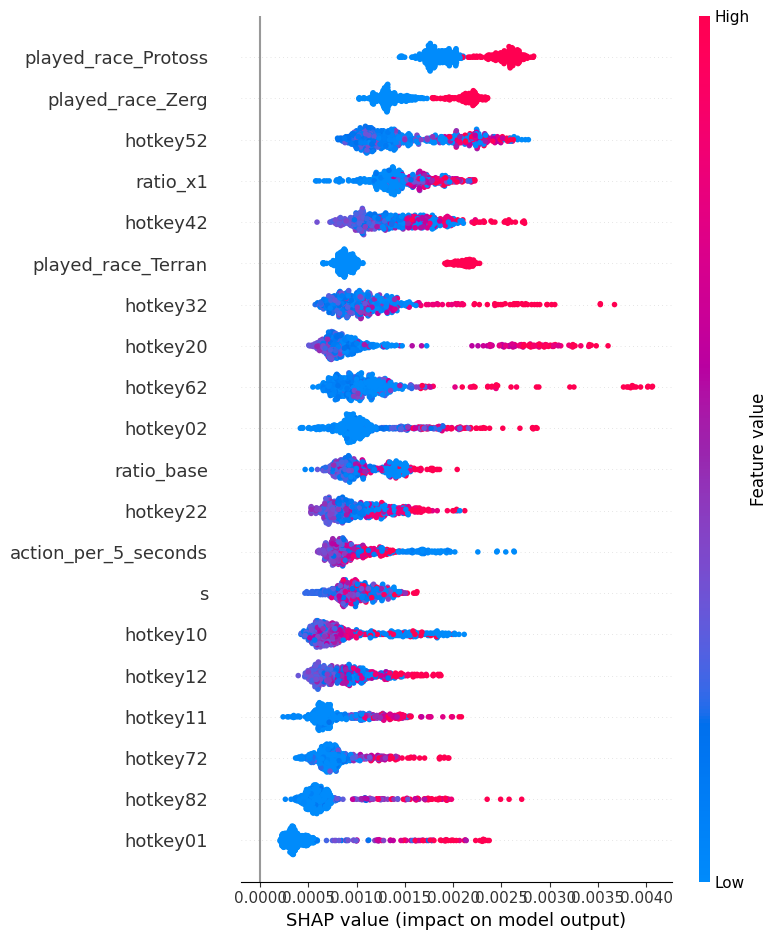

In [49]:
plt.figure(figsize=(14, 10))
shap.summary_plot(np.mean(np.abs(shap_values), axis=2), X_test)



In [28]:
# Compute mean absolute SHAP values across all classes
mean_shap_values = np.mean(np.abs(shap_values), axis=(0, 2))

# Convert to a dictionary for better readability
feature_importance = dict(zip(X_test.columns, mean_shap_values))

# Sort by importance
feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Print feature importance
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance:.4f}")

played_race_Protoss: 0.0021
played_race_Zerg: 0.0016
hotkey52: 0.0016
ratio_x1: 0.0015
hotkey42: 0.0014
played_race_Terran: 0.0012
hotkey32: 0.0012
hotkey20: 0.0012
hotkey62: 0.0011
hotkey02: 0.0011
ratio_base: 0.0011
hotkey22: 0.0010
action_per_5_seconds: 0.0010
s: 0.0010
hotkey10: 0.0009
hotkey12: 0.0009
hotkey11: 0.0009
hotkey72: 0.0008
hotkey82: 0.0007
hotkey01: 0.0005
ratio_mineral: 0.0004
hotkey21: 0.0002
ratio_s: 0.0002
hotkey31: 0.0002
hotkey81: 0.0002
s_f5: 0.0001
Base_f5: 0.0001
hotkey10_f5: 0.0001
hotkey20_f5: 0.0001
hotkey30_f5: 0.0001
hotkey40_f5: 0.0001
hotkey00_f5: 0.0001
hotkey50_f5: 0.0001
hotkey60_f5: 0.0000
hotkey90_f5: 0.0000
hotkey12_f5: 0.0000
hotkey22_f5: 0.0000
hotkey70_f5: 0.0000
hotkey42_f5: 0.0000
hotkey80_f5: 0.0000
hotkey52_f5: 0.0000
hotkey62_f5: 0.0000
hotkey61_f5: 0.0000
hotkey21_f5: 0.0000
hotkey41_f5: 0.0000
hotkey11_f5: 0.0000


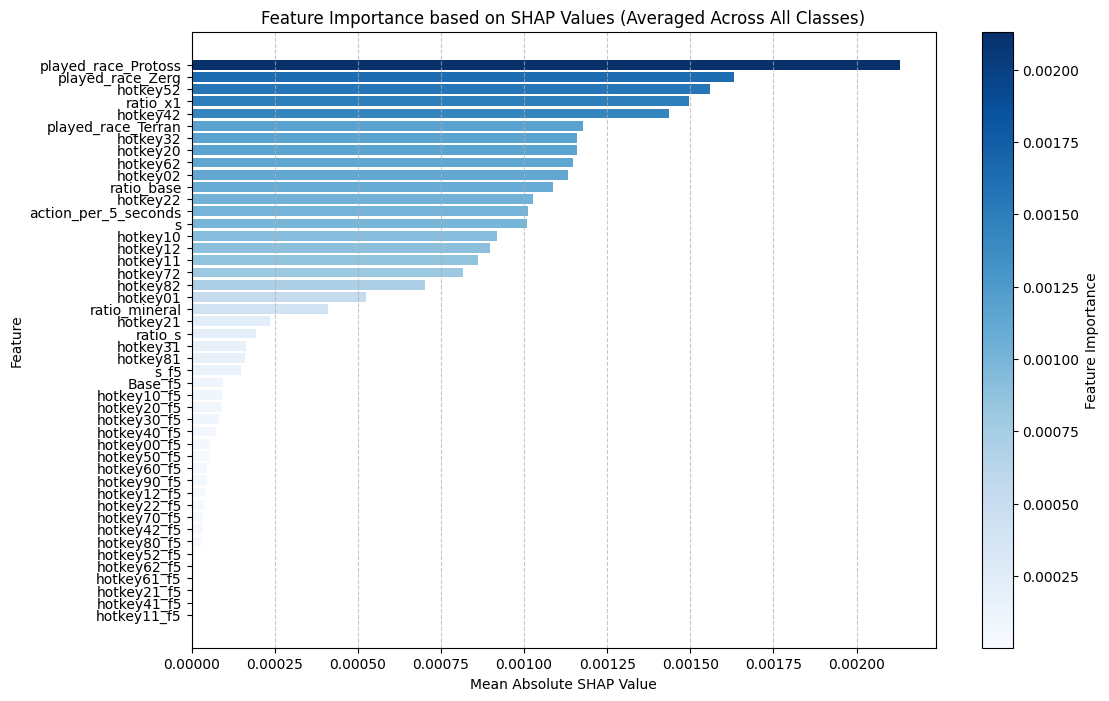

In [29]:

import matplotlib.colors as mcolors

# Compute mean absolute SHAP values across all classes
mean_shap_values = np.mean(np.abs(shap_values), axis=(0, 2))

# Convert to a dictionary for better readability
feature_importance = dict(zip(X_test.columns, mean_shap_values))

# Sort by importance
feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Extract features and their importance values
features = list(feature_importance.keys())
importances = list(feature_importance.values())

# Create a colormap for the bars (using a blue colormap)
cmap = plt.cm.Blues  # You can change this to other color maps like 'coolwarm', 'viridis', etc.
norm = mcolors.Normalize(vmin=min(importances), vmax=max(importances))  # Normalize to map importance to color

# Increase the figure size for better visibility
fig, ax = plt.subplots(figsize=(12, 8))  # Create a figure and axis

# Plot the feature importances as a bar chart with color gradient
bars = ax.barh(features[::-1], importances[::-1], color=cmap(norm(importances[::-1])))  # Gradient color

# Add color bar to show the scale, using the same axis (ax)
cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
cbar.set_label("Feature Importance")

# Labels and title
ax.set_xlabel("Mean Absolute SHAP Value")
ax.set_ylabel("Feature")
ax.set_title("Feature Importance based on SHAP Values (Averaged Across All Classes)")
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



Normalizing SHAP values with a softmax function: one intituive way to visualize the features contirbutions on overall classes

In [38]:


# Compute mean absolute SHAP values across all classes
mean_shap_values = np.mean(np.abs(shap_values), axis=(0, 2))

# Apply the softmax function to the mean SHAP values
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max to improve numerical stability
    return exp_x / exp_x.sum(axis=0)

# Apply softmax to the mean SHAP values
softmax_values = softmax(mean_shap_values)

# Convert to a dictionary for better readability
feature_importance = dict(zip(X_test.columns, mean_shap_values))
softmax_importance = dict(zip(X_test.columns, softmax_values))

# Sort by importance (mean SHAP values)
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))
sorted_softmax_importance = dict(sorted(softmax_importance.items(), key=lambda item: item[1], reverse=True))

# Print feature importance and corresponding softmax values
for feature in sorted_feature_importance:
    print(f"{feature}: {sorted_feature_importance[feature]:.4f} (Softmax: {sorted_softmax_importance[feature]:.4f})")


played_race_Protoss: 0.0022 (Softmax: 0.0218)
ratio_x1: 0.0017 (Softmax: 0.0218)
hotkey52: 0.0016 (Softmax: 0.0218)
played_race_Zerg: 0.0015 (Softmax: 0.0218)
hotkey42: 0.0014 (Softmax: 0.0218)
played_race_Terran: 0.0013 (Softmax: 0.0218)
hotkey32: 0.0012 (Softmax: 0.0218)
hotkey20: 0.0012 (Softmax: 0.0218)
hotkey62: 0.0012 (Softmax: 0.0218)
hotkey02: 0.0012 (Softmax: 0.0218)
ratio_base: 0.0010 (Softmax: 0.0217)
hotkey22: 0.0010 (Softmax: 0.0217)
s: 0.0010 (Softmax: 0.0217)
action_per_5_seconds: 0.0010 (Softmax: 0.0217)
hotkey12: 0.0010 (Softmax: 0.0217)
hotkey10: 0.0010 (Softmax: 0.0217)
hotkey11: 0.0009 (Softmax: 0.0217)
hotkey72: 0.0009 (Softmax: 0.0217)
hotkey82: 0.0007 (Softmax: 0.0217)
hotkey01: 0.0005 (Softmax: 0.0217)
ratio_mineral: 0.0005 (Softmax: 0.0217)
hotkey21: 0.0003 (Softmax: 0.0217)
ratio_s: 0.0002 (Softmax: 0.0217)
hotkey81: 0.0002 (Softmax: 0.0217)
s_f5: 0.0002 (Softmax: 0.0217)
hotkey31: 0.0002 (Softmax: 0.0217)
Base_f5: 0.0001 (Softmax: 0.0217)
hotkey30_f5: 0.0001 

Due to the high quantity of features, the softmax transformation generated very approximate values for the nromalzied shap values. Therefore, it is not a more direct and clear way to analyse the features' contributions. 

#### Local view: individual prediction

In [ ]:
# Select the class for which you want to generate the force plot
class_idx = 42  # Change this index to the class you want to visualize

# Extract SHAP values for the first instance and selected class
shap_values_class = shap_values[class_idx][0]  # SHAP values for the first instance for the given class

# Ensure that the shape of shap_values_class aligns with the feature names in X_test
shap.force_plot(
    explainer.expected_value[class_idx],        # Expected value for the selected class
    shap_values_class,                           # SHAP values for the first instance
    X_test.iloc[0, :],                          # Feature values for the first test sample
    feature_names=X_test.columns.tolist()       # Ensure feature names are correctly passed
)



Waterfall plot to understand why an instance X was classified as a class X. 

In [35]:
# Step 2: Find an instance where the model predicted class 40
class_idx = 40  # The class we want to analyze
sample_idx = np.where(y_pred == class_idx)[0][0] 
sample_idx

np.int64(8)

In [38]:
X_test.iloc[sample_idx]


ratio_s                  0.077916
ratio_base               0.001139
ratio_mineral            0.000095
action_per_5_seconds    17.418478
ratio_x1                 0.005057
hotkey01                      0.0
hotkey02                 0.805464
hotkey10                 0.016393
hotkey11                 0.012022
hotkey12                  0.47541
hotkey20                 0.018579
hotkey21                 0.001093
hotkey22                 0.205464
hotkey31                      0.0
hotkey32                 0.002186
hotkey42                      0.0
hotkey52                      0.0
hotkey62                 0.980328
hotkey72                 0.024044
hotkey81                      0.0
hotkey82                      0.0
s                        0.897268
hotkey00_f5                   1.0
hotkey10_f5                   1.0
hotkey11_f5                   0.0
hotkey12_f5                   0.0
hotkey20_f5                   0.0
hotkey21_f5                   0.0
hotkey22_f5                   0.0
hotkey30_f5   

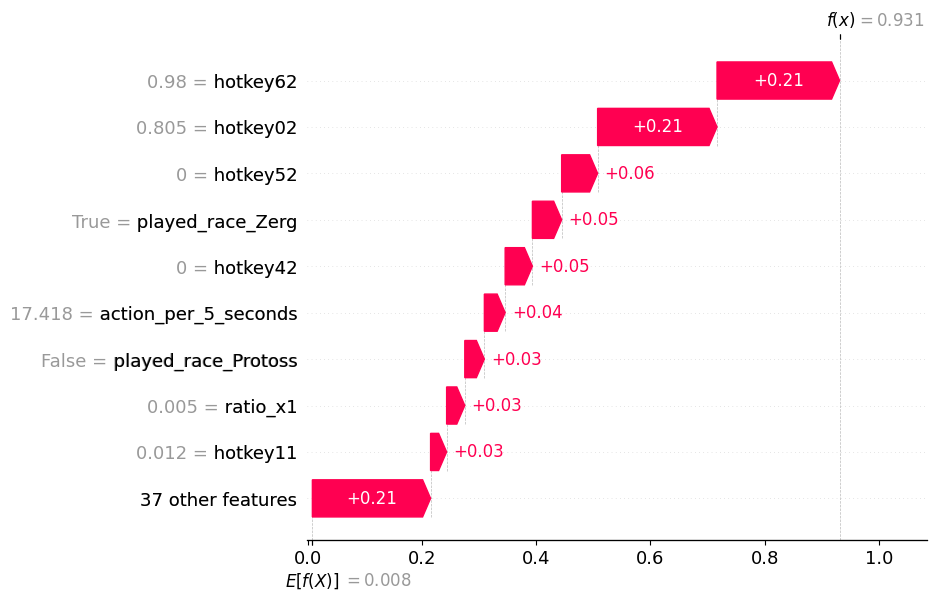

In [36]:

# Extract SHAP values and base value correctly
shap_values_class = shap.Explanation(
    values=shap_values[sample_idx, :, class_idx],  # SHAP values for the selected class
    base_values=explainer.expected_value[class_idx],  # Expected value for the class
    data=X_test.iloc[sample_idx, :],  # Feature values for the selected instance
    feature_names=X_test.columns  # Feature names
)

# Generate the waterfall plot
shap.plots.waterfall(shap_values_class)

Waterfall plot to understand why an instance X was NOT classified as a class X. 

In [41]:
# Step 2: Find an instance where the model predicted class 40
class_idx = 40  # The class we want to analyze
sample_idx_not = np.where(y_pred != class_idx)[0][0] 
sample_idx_not

np.int64(0)

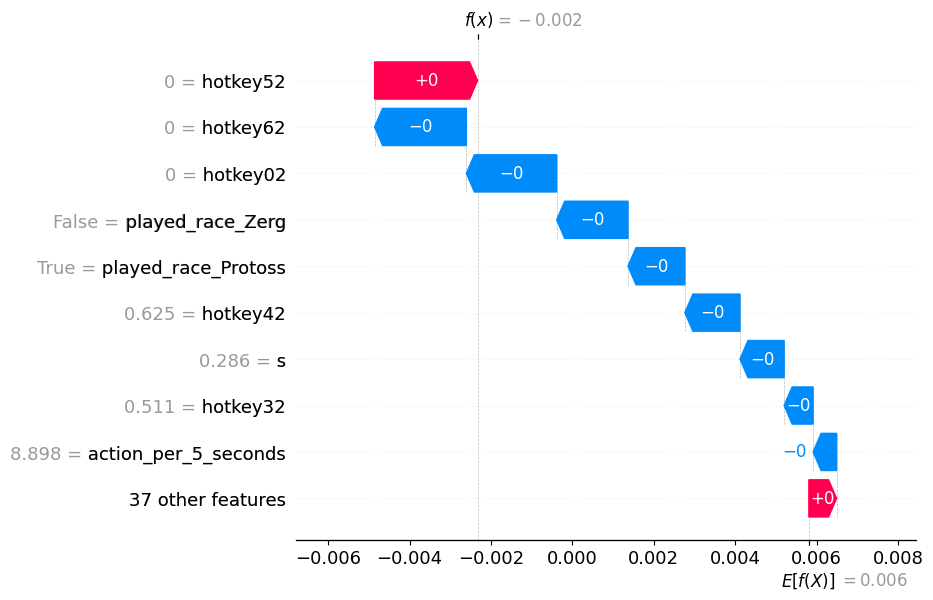

In [42]:
# Extract SHAP values and base value correctly
shap_values_class = shap.Explanation(
    values=shap_values[sample_idx_not, :, class_idx],  # SHAP values for the selected class
    base_values=explainer.expected_value[sample_idx_not],  # Expected value for the class
    data=X_test.iloc[sample_idx_not, :],  # Feature values for the selected instance
    feature_names=X_test.columns  # Feature names
)

# Generate the waterfall plot
shap.plots.waterfall(shap_values_class)

# Predict on test set

In [157]:
#load the calculated features on the test set
features_test = pd.read_csv('data/output/combined2.csv')
features_test.head(5)

,Base,SingleMineral,hotkey00,hotkey01,hotkey02,hotkey10,hotkey11,hotkey12,hotkey20,hotkey21,...,hotkey71,hotkey72,hotkey80,hotkey81,hotkey82,hotkey90,hotkey91,hotkey92,s,0
0,0.005810,0.000917,0.004281,0.0,0.259021,0.002141,0.009480,0.107645,0.003058,0.000000,...,0.0,0.013150,0.000000,0.0,0.000000,0.001835,0.0,0.008869,0.259327,0.019583
1,0.000000,0.000000,0.000902,0.0,0.014885,0.006315,0.000000,0.151556,0.013983,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000451,0.0,0.021200,0.258006,0.032219
2,0.005719,0.000000,0.000286,0.0,0.000000,0.002860,0.000000,0.136975,0.015156,0.000000,...,0.0,0.009151,0.001430,0.0,0.014012,0.000000,0.0,0.000000,0.158993,0.046217
3,0.005640,0.000664,0.000000,0.0,0.000000,0.022561,0.029529,0.174187,0.004313,0.001991,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.526875,0.064677
4,0.039474,0.000000,0.005639,0.0,0.000000,0.007519,0.013158,0.139098,0.015038,0.000000,...,0.0,0.005639,0.007519,0.0,0.001880,0.000000,0.0,0.000000,0.443609,0.134545


In [158]:
# Compare column names
train_columns = set(X_train.columns)  # Columns from the training data
test_columns = set(features_test.columns)    # Columns from the test data

if train_columns != test_columns:
    print("Mismatch in columns!")
    print("Missing in test:", train_columns - test_columns)
    print("Extra in test:", test_columns - train_columns)

In [136]:
missing_columns = ['hotkey72.1', 'hotkey82.1', 'hotkey11.1', 'hotkey71.1']

# Add the missing columns and set their values to 0
for col in missing_columns:
    features_test[col] = 0

In [137]:
# Reorder the columns in 'df' to match the order in 'reference_df'
features_test = features_test[X_train.columns]

KeyError: "['0'] not in index"

In [159]:
#assert the column headers are in str format
features_test.columns = features_test.columns.astype(str)
#run prediction on test set
y_pred = rf_model.predict(features_test)

In [160]:
#save predictions to csv file
pd.DataFrame(y_pred).to_csv('data/predictions/predictions_kaggle4.csv', index=False)